<a href="https://colab.research.google.com/github/team-10-ACM-ML/Week-1/blob/master/Copy_of_Week1(PopularCourses).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving udemy_courses.csv to udemy_courses.csv


In [ ]:
data = pd.read_csv('udemy_courses.csv')
data.head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.0,2016-02-21T18:23:12Z,Business Finance
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.5,2015-01-30T22:13:03Z,Business Finance
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,True,195,5172,34,38,Expert Level,2.5,2015-05-28T00:14:03Z,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.0,2017-04-18T18:13:32Z,Business Finance


In [ ]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])
data['year']=pd.DatetimeIndex(data['published_timestamp']).year


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_title         3678 non-null   object             
 1   is_paid              3678 non-null   bool               
 2   price                3678 non-null   int64              
 3   num_subscribers      3678 non-null   int64              
 4   num_reviews          3678 non-null   int64              
 5   num_lectures         3678 non-null   int64              
 6   level                3678 non-null   object             
 7   content_duration     3678 non-null   float64            
 8   published_timestamp  3678 non-null   datetime64[ns, UTC]
 9   subject              3678 non-null   object             
 10  year                 3678 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(5), object(3)
memory usage: 

In [ ]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5
year,3678.0,2015.431213,1.185317,2011.0,2015.0,2016.0,2016.00,2017.0


In [ ]:
subjects_list=data["subject"].unique()
subject_count=data['subject'].value_counts().reset_index()


In [ ]:
fig=px.bar(subject_count,x='index',y='subject',text='subject',color='subject',title='courses per subject',labels={'index':'Subject','subject':'No. of courses'})
fig.update_layout(showlegend=False, width=600)
fig.show()


In [ ]:
courses_charge=data['is_paid'].value_counts().reset_index()
fig=px.pie(courses_charge,values='is_paid',names='index',title='Free Vs Paid courses')
fig.update_layout(showlegend=True, width=600)
fig.show()


In [ ]:
courses_level=data['level'].value_counts().reset_index()
fig=px.pie(courses_level,values='level',names='index',title='Offered courses Level')
fig.update_layout(showlegend=True, width=600)
fig.show()


In [ ]:
data_sorted=data.sort_values(['num_subscribers'],ascending=[False])
fig=px.bar(data_sorted[0:6],x='course_title',y='num_subscribers',text='num_subscribers',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [ ]:
data_sorted_reviews=data.sort_values(['num_reviews'],ascending=[False])
fig=px.bar(data_sorted_reviews[0:6],x='course_title',y='num_reviews',text='num_reviews',color='price',title='Top 5 courses by subcription count')
fig.update_layout(showlegend=False, width=600)
fig.show()


In [ ]:
data_BF=data[data['subject']==subjects_list[0]]
data_GD=data[data['subject']==subjects_list[1]]
data_MI=data[data['subject']==subjects_list[2]]
data_WD=data[data['subject']==subjects_list[3]]

BF_stats=pd.crosstab(data_BF.year,data_BF.is_paid)
GD_stats=pd.crosstab(data_GD.year,data_GD.is_paid)
MI_stats=pd.crosstab(data_MI.year,data_MI.is_paid)
WD_stats=pd.crosstab(data_WD.year,data_WD.is_paid)


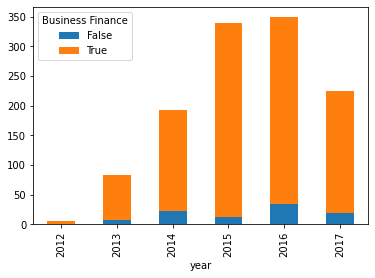

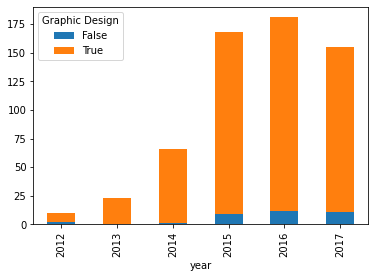

In [ ]:
BF_stats.plot.bar(stacked=True)
plt.legend(title='Business Finance')
plt.show()

GD_stats.plot.bar(stacked=True)
plt.legend(title='Graphic Design')
plt.show()


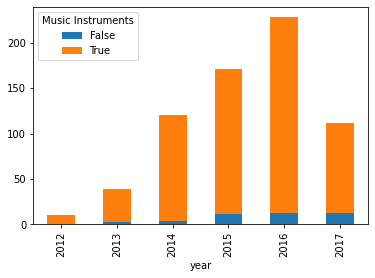

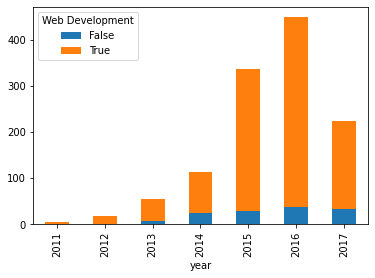

In [ ]:
MI_stats.plot.bar(stacked=True)
plt.legend(title='Music Instruments')
plt.show()

WD_stats.plot.bar(stacked=True)
plt.legend(title='Web Development')
plt.show()


In [ ]:
courselevel_BF=data_BF['level'].value_counts().reset_index()
courselevel_GD=data_BF['level'].value_counts().reset_index()
courselevel_MI=data_BF['level'].value_counts().reset_index()
courselevel_WD=data_BF['level'].value_counts().reset_index()


In [ ]:
fig=px.pie(courselevel_BF,values='level',names='index',title='Business Finance-courses Level')
fig.update_layout(showlegend=True, width=500)
fig.show()

fig=px.pie(courselevel_GD,values='level',names='index',title='Graphic Design-courses Level')
fig.update_layout(showlegend=True, width=500)
fig.show()


In [ ]:
fig=px.pie(courselevel_MI,values='level',names='index',title='Musical Instrtuments-courses Level')
fig.update_layout(showlegend=True, width=500)
fig.show()

fig=px.pie(courselevel_WD,values='level',names='index',title='Web Development-courses Level')
fig.update_layout(showlegend=True, width=500)
fig.show()


Top subscribed courses per subject:


In [ ]:
sorted_data_BF=data_BF.sort_values(['num_subscribers'],ascending=[False])
sorted_data_BF.head(5)


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
492,Bitcoin or How I Learned to Stop Worrying and ...,False,0,65576,936,24,All Levels,8.0,2013-04-20 02:25:22+00:00,Business Finance,2013
143,Accounting in 60 Minutes - A Brief Introduction,False,0,56659,4397,16,Beginner Level,1.5,2013-04-07 21:39:25+00:00,Business Finance,2013
103,Stock Market Investing for Beginners,False,0,50855,2698,15,Beginner Level,1.5,2013-12-25 19:53:34+00:00,Business Finance,2013
119,Introduction to Financial Modeling,False,0,29167,1463,8,Intermediate Level,1.5,2014-05-27 16:22:16+00:00,Business Finance,2014
40,The Complete Financial Analyst Course 2017,True,195,24481,2347,174,All Levels,10.0,2016-01-21 01:38:48+00:00,Business Finance,2016


In [ ]:
sorted_data_GD=data_GD.sort_values(['num_subscribers'],ascending=[False])
sorted_data_GD.head(5)


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
1461,Photoshop In-Depth: Master all of Photoshop's ...,False,0,53851,1779,45,All Levels,4.5,2014-11-30 04:22:11+00:00,Graphic Design,2014
1286,Figure Drawing From Life Using The Reilly Tech...,False,0,47811,1041,22,All Levels,2.5,2012-05-09 18:14:57+00:00,Graphic Design,2012
1390,Professional Logo Design in Adobe Illustrator,False,0,44044,1563,45,All Levels,7.5,2015-01-22 11:18:06+00:00,Graphic Design,2015
1213,Photoshop for Entrepreneurs - Design 11 Practi...,True,200,36288,737,63,All Levels,5.0,2016-06-09 01:57:03+00:00,Graphic Design,2016
1531,Logo Design Essentials,True,20,33205,481,12,All Levels,0.7,2014-06-30 03:09:27+00:00,Graphic Design,2014


In [ ]:
sorted_data_MI=data_MI.sort_values(['num_subscribers'],ascending=[False])
sorted_data_MI.head(5)


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
1896,Free Beginner Electric Guitar Lessons,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments,2012
1979,Pianoforall - Incredible New Way To Learn Pian...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51+00:00,Musical Instruments,2014
2004,Getting Started with Playing Guitar,False,0,47652,1141,26,Beginner Level,4.0,2013-05-29 15:28:07+00:00,Musical Instruments,2013
1982,Complete Guitar System - Beginner to Advanced,True,145,32935,2713,310,All Levels,34.0,2013-05-29 15:24:47+00:00,Musical Instruments,2013
2043,Learn Guitar in 21 Days,True,20,26504,192,82,Beginner Level,2.5,2012-10-21 20:36:50+00:00,Musical Instruments,2012


In [ ]:
sorted_data_WD=data_WD.sort_values(['num_subscribers'],ascending=[False])
sorted_data_WD.head(5)


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
2827,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,2013
3032,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development,2013
3230,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,2015
2783,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development,2014
3232,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,2016
